In [1]:
import pandas as pd

In [ ]:
# let's read in the partisan chunks 
partisan_ref = pd.read_csv("/Data/partisan/chunks/chunk_dat.csv")
partisan_ref.head()

,Unnamed: 0,chunk_id,file_name,date,party,event,chunk_text_clean,hash
0,0,1,rnc16_071816.txt,2016-07-18,rep,rnc16,Mr chairman fellow delegates I offer the follo...,1c77320848389ed8b68bbc2d1eb363b5
1,1,1,rnc16_071916_6.txt,2016-07-19,rep,rnc16,good evening I'm honored to be here and this N...,57c675ace635f1d99834562d5bdc7113
2,2,1,rnc16_071916_7.txt,2016-07-19,rep,rnc16,ladies and Gentlemen please welcome an America...,0c1db2884b3651af4e56abe775b081f9
3,3,1,rnc16_071916_5.txt,2016-07-19,rep,rnc16,please welcome Milwaukee County Sheriff David ...,c8c81eeda7b0c75e885c10f1c6cba2e8
4,4,1,rnc16_071916_4.txt,2016-07-19,rep,rnc16,cable we are thank you everybody thank yo...,c3c17224ef63d4ad2336da515f43ae63


In [7]:
# separating dem and rep
dem_text_chunks = partisan_ref[partisan_ref["party"]=="dem"].chunk_text_clean.tolist()
rep_text_chunks = partisan_ref[partisan_ref["party"]=="rep"].chunk_text_clean.tolist()
dem_text_corpus = " ".join(dem_text_chunks)
rep_text_corpus = " ".join(rep_text_chunks)

In [5]:
from typing import List
import string
import re
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures
from keyness import log_likelihood


def clean_punctuation(tokens: List[str]) -> List[str]:
    return [w.strip(string.punctuation) for w in tokens if w.strip(string.punctuation)]

# Tokenize function
def tokenize(text: str) -> List[str]:
    return re.split(r"\s+", text)

# Custom additional stopwords
custom_stopwords = set([
    "'", "♪", "-", ">", "=", ".", ",", "á", "é", 
    "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", 
    "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", 
    "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", 
    "u", "v", "w", "x", "y", "z",
    '"', "”", "“", "¿", "í", "ó", "&", ">", "<", "(", ")", "[", "]", "{", "}", ":", ";", "!", "?", "/", "\\", 
    "1", "2", "3", "4", "5", "6", "7", "8", "9", "0", "uh", 'um'
])

# Modified function to filter both standard stopwords and custom stopwords
def filter_stopwords(tokens: List[str]) -> List[str]:
    stop_words = set(stopwords.words('english'))  # Load standard stopwords
    all_stopwords = stop_words.union(custom_stopwords)  # Merge with custom list
    
    # Ensure lowercase matching and remove empty or whitespace-only tokens
    return [w.lower().strip() for w in tokens if w.lower().strip() not in all_stopwords and w.strip()]

# Plots most common words
def plot_most_common_words(tokens: List[str], count: int = 30) -> None:
    freqDist = FreqDist(tokens)
    freqDist.plot(count, title='Frequency distribution for 30 most common words')

# Plots word cloud
def plot_wordcloud(tokens: List[str]) -> None:
    dictionary = Counter(tokens)
    cloud = WordCloud(max_font_size=80, colormap="hsv").generate_from_frequencies(dictionary)
    plt.figure(figsize=(16, 12))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

Target Corpus Frequency Sample: [('know', 3457), ('people', 3328), ('president', 2728), ('going', 2713), ('get', 2325), ('us', 2286), ('one', 2049), ("i'm", 1908), ('make', 1878), ('country', 1762)]
Reference Corpus Frequency Sample: [('going', 27305), ('know', 26626), ('people', 19669), ("we're", 17787), ('said', 15102), ('like', 14228), ('right', 13910), ('country', 13132), ('great', 12791), ('want', 12764)]

1st 25 Target Corpus Words:
 ['pe', 'oh', 'oh', 'back', 'wow', 'wow', 'hello', 'north', 'carolina', 'amazing', 'crowd', 'acutely', 'aware', 'thing', 'standing', 'star', 'show', "i'm", 'going', 'try', 'stay', 'brief', 'although', 'strong', 'suit']

1st 25 Reference Corpus Words:
 ['mr', 'chairman', 'fellow', 'delegates', 'offer', 'following', 'resolution', 'ask', 'immediate', 'consideration', 'resolved', 'rules', 'printed', 'distributed', 'adopted', 'rules', 'election', 'governing', 'republican', 'national', 'committee', 'rules', 'delegates', 'alternate', 'delegates']

Keyword LL

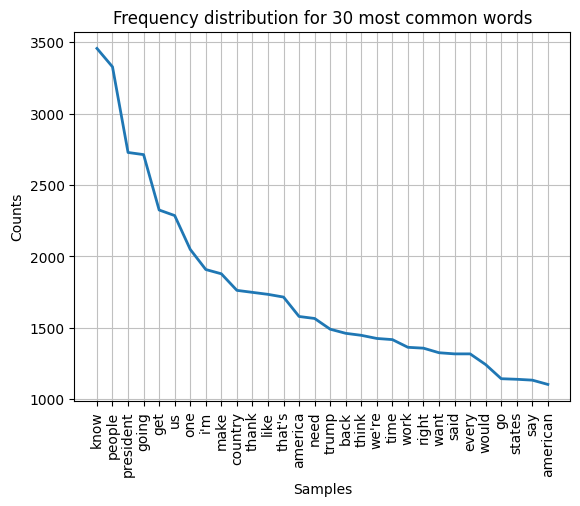

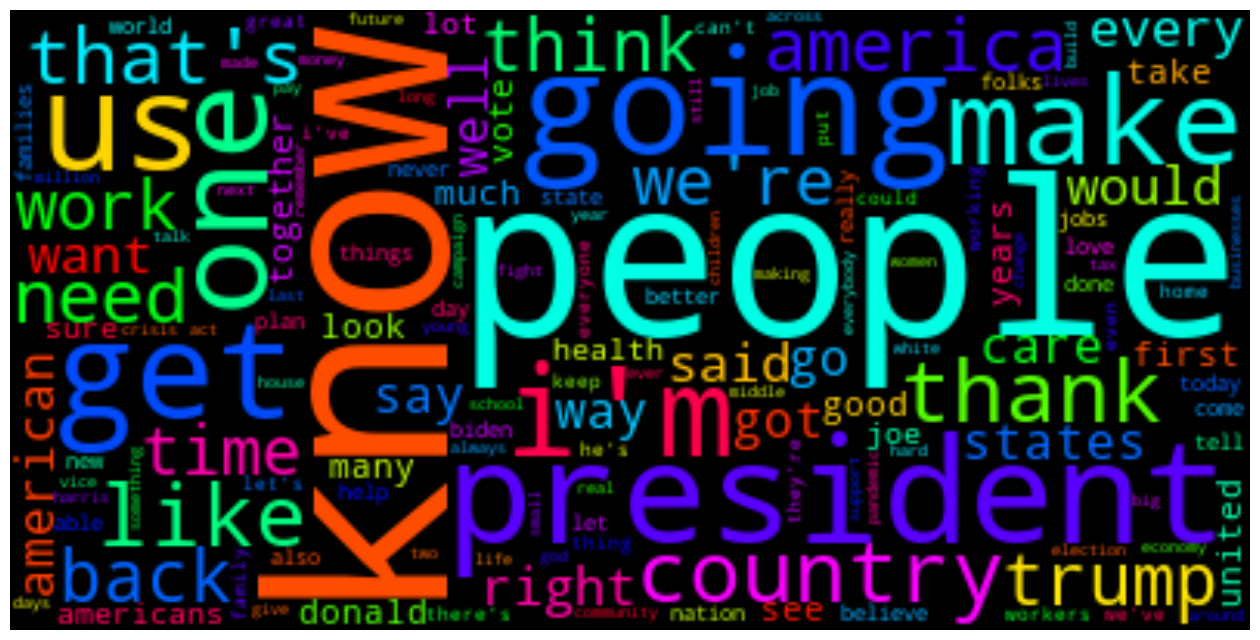

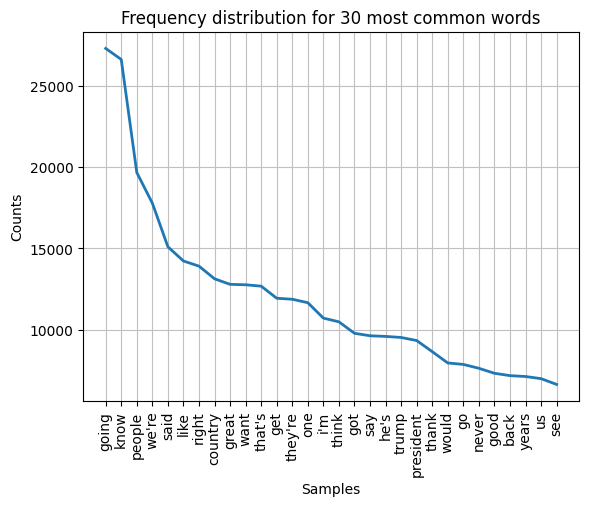

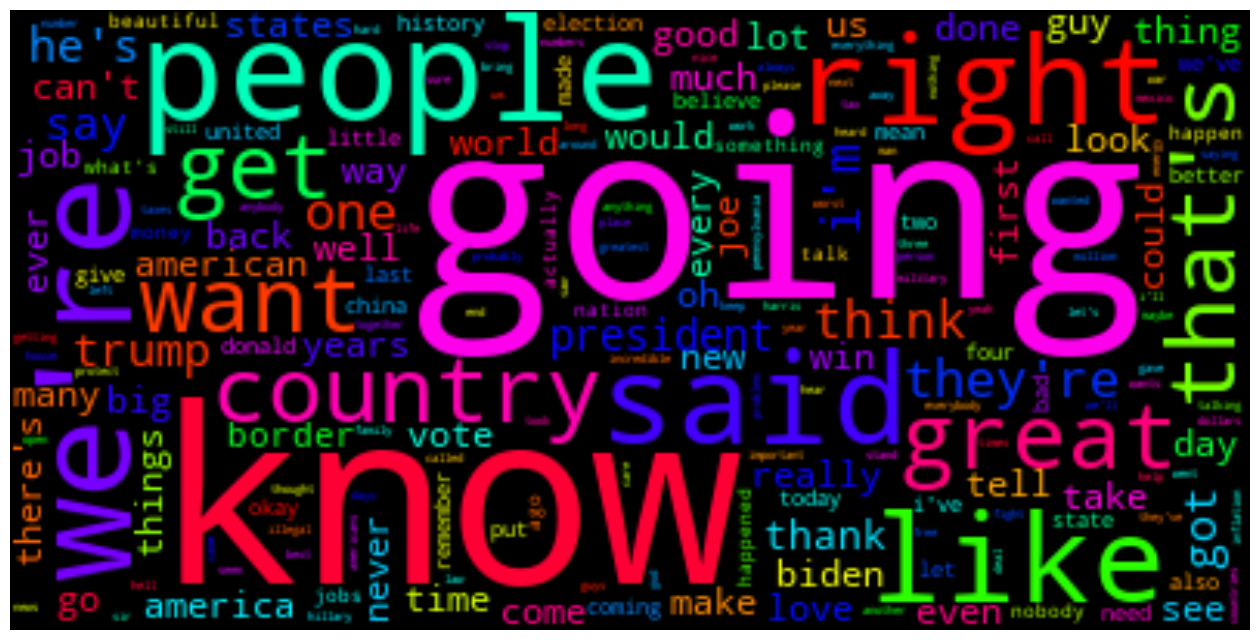

In [ ]:
lex_tokens = tokenize(dem_text_corpus.lower())
ref_lex_tokens = tokenize(rep_text_corpus.lower())    
lex_tokens = clean_punctuation(lex_tokens)
ref_lex_tokens = clean_punctuation(ref_lex_tokens)
lex_tokens = filter_stopwords(lex_tokens)
ref_lex_tokens = filter_stopwords(ref_lex_tokens)
    
# Define corpus and reference corpus correctly
corpus = lex_tokens
reference_corpus = ref_lex_tokens
    
# Convert tokens into frequency dictionaries
corpus_freq = Counter(corpus)  # Count occurrences of words in target corpus
ref_freq = Counter(reference_corpus)  # Count occurrences in reference corpus
    
# Log-likelihood keyness testing
keyness_results = log_likelihood([corpus], [reference_corpus])
    
# Bigrams and Trigrams
bigram_collocation = BigramCollocationFinder.from_words(corpus)
bigrams = bigram_collocation.nbest(BigramAssocMeasures.likelihood_ratio, 50)
    
trigram_collocation = TrigramCollocationFinder.from_words(corpus)
trigrams = trigram_collocation.nbest(TrigramAssocMeasures.likelihood_ratio, 50)
    
# Debug LL results
print("Target Corpus Frequency Sample:", corpus_freq.most_common(10))
print("Reference Corpus Frequency Sample:", ref_freq.most_common(10))
    
# Print results
print("\n1st 25 Target Corpus Words:\n", lex_tokens[:25])
print("\n1st 25 Reference Corpus Words:\n", ref_lex_tokens[:25])
    
print("\nKeyword LL  Freq(Tgt) Freq(Ref)")
for x in range(min(200, len(keyness_results))):
    print(keyness_results[x])
print("\nBigrams:")
for x in range(min(75, len(bigrams))):
    print(bigrams[x])
print("\nTrigrams:")
for x in range(min(75, len(trigrams))):
    print(trigrams[x])

bigrams = bigram_collocation.nbest(BigramAssocMeasures.pmi, 500)
trigrams = trigram_collocation.nbest(TrigramAssocMeasures.pmi, 500)

print("\nBigrams pmi:")
for x in range(min(500, len(bigrams))):
    print(bigrams[x])
print("\nTrigrams pmi:")
for x in range(min(500, len(trigrams))):
    print(trigrams[x])

# Bigrams and Trigrams
bigram_collocation = BigramCollocationFinder.from_words(reference_corpus)
bigrams = bigram_collocation.nbest(BigramAssocMeasures.likelihood_ratio, 50)
    
trigram_collocation = TrigramCollocationFinder.from_words(reference_corpus)
trigrams = trigram_collocation.nbest(TrigramAssocMeasures.likelihood_ratio, 50)
    
    
print("\nBigrams ref:")
for x in range(min(75, len(bigrams))):
    print(bigrams[x])
print("\nTrigrams ref:")
for x in range(min(75, len(trigrams))):
    print(trigrams[x])

bigrams = bigram_collocation.nbest(BigramAssocMeasures.pmi, 500)
trigrams = trigram_collocation.nbest(TrigramAssocMeasures.pmi, 500)
    
    
print("\nBigrams ref PMI:")
for x in range(min(500, len(bigrams))):
    print(bigrams[x])
print("\nTrigrams ref:")
for x in range(min(500, len(trigrams))):
    print(trigrams[x])
    
# Generate frequency plots
plot_most_common_words(corpus)
plot_wordcloud(corpus)

# Generate frequency plots
plot_most_common_words(reference_corpus)
plot_wordcloud(reference_corpus)

Vocabulary size: 9325

Top words per topic:
Topic 1: know people president thank country going america need make like
Topic 2: harris love thank know freedom oh time win work ready
Topic 3: going people trump president make know care like said donald

Document-Topic Distribution:
                                              Document Dominant Topic
0    pe oh oh back wow wow hello north carolina ama...        Topic 1
1    lot time good portion savings also lot emotion...        Topic 1
2    biggest state fights big banks ripped homeowne...        Topic 3
3    importantly raleigh right we're fighting hey e...        Topic 1
4    oh oh oh oh yeah bl right oh beautiful spaceou...        Topic 1
..                                                 ...            ...
790  times said paid 750 taxes one year guess asked...        Topic 3
791  president ask like vladimir putin's puppy trum...        Topic 1
792  worried told public truth would panic financia...        Topic 3
793  like sons daug

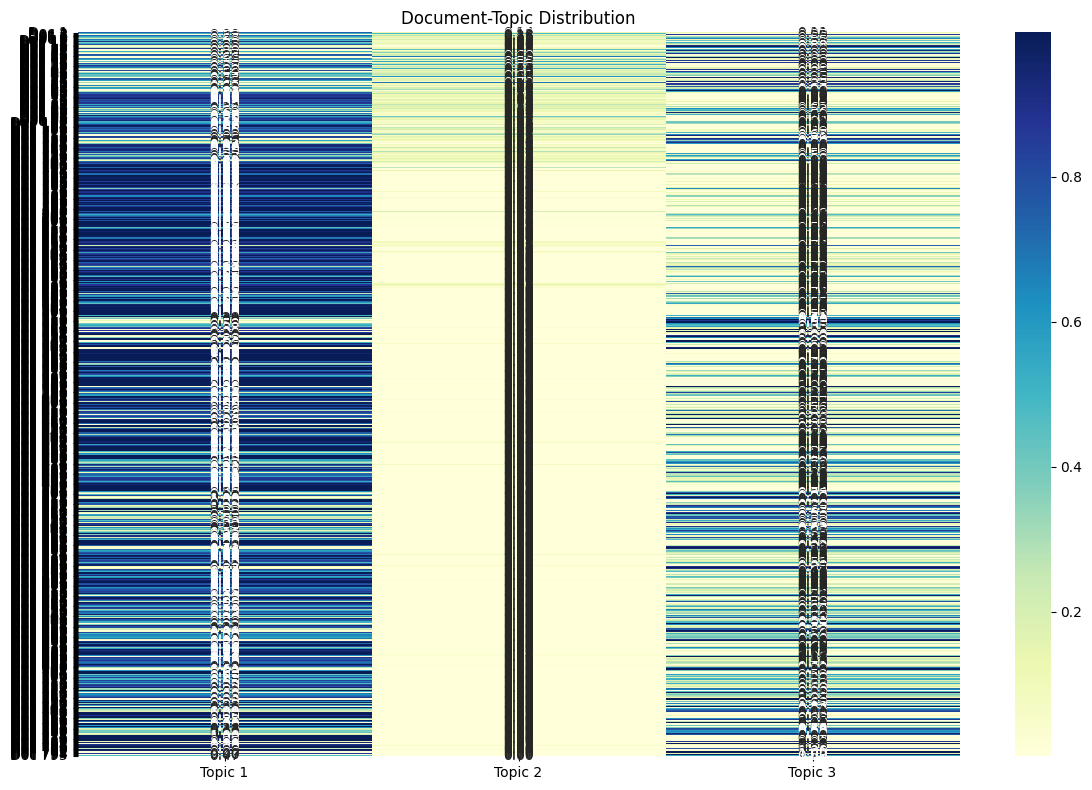

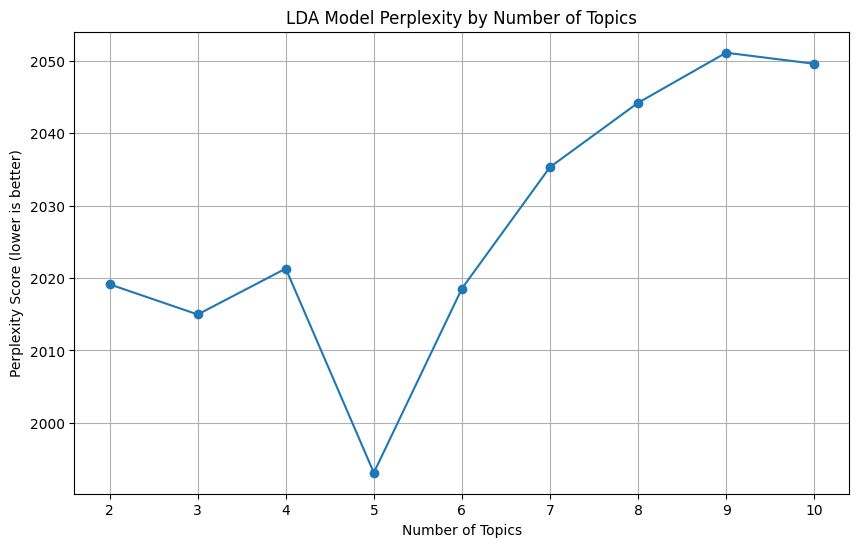

In [31]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

documents = dem_text_chunks
lex_tokens = [filter_stopwords(clean_punctuation(tokenize(i.lower()))) for i in documents]
documents = [' '.join(i) for i in lex_tokens]
# Step 2: Convert text data to document-term matrix
# Create a count vectorizer with specific parameters
vectorizer = CountVectorizer(
    stop_words='english',       # Remove English stop words
    max_df=0.95,                # Ignore terms that appear in >95% of documents
    min_df=2,                   # Ignore terms that appear in fewer than 2 documents
    ngram_range=(1, 1)          # Only use single words (unigrams)
)

# Convert documents to a document-term matrix
dtm = vectorizer.fit_transform(documents)

# Get the vocabulary
vocabulary = vectorizer.get_feature_names_out()
print(f"Vocabulary size: {len(vocabulary)}")

# Step 3: Train the LDA model
# Create and fit the LDA model
lda_model = LatentDirichletAllocation(
    n_components=3,             # Number of topics
    random_state=42,            # For reproducibility
    learning_method='online',   # Faster for larger datasets
    max_iter=20,                # Number of iterations
    learning_offset=50.0,       # Downweights early iterations
    doc_topic_prior=0.1,        # Dirichlet prior on document-topic distribution (alpha)
    topic_word_prior=0.01       # Dirichlet prior on topic-word distribution (beta)
)

# Fit the model to the document-term matrix
lda_model.fit(dtm)

# Step 4: Analyze results

# Function to display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict[f"Topic {topic_idx+1}"] = topic_words
        print(f"Topic {topic_idx+1}: {' '.join(topic_words)}")
    return topic_dict

# Display the top 10 words for each topic
print("\nTop words per topic:")
topic_words = display_topics(lda_model, vocabulary, 10)

# Get document-topic distributions
doc_topic_dist = lda_model.transform(dtm)

# Create a DataFrame to see which topics are dominant in each document
doc_topic_df = pd.DataFrame(doc_topic_dist, 
                          columns=[f'Topic {i+1}' for i in range(lda_model.n_components)])
doc_topic_df['Dominant Topic'] = doc_topic_df.idxmax(axis=1)
doc_topic_df['Document'] = [doc[:50] + "..." if len(doc) > 50 else doc for doc in documents]

print("\nDocument-Topic Distribution:")
print(doc_topic_df[['Document', 'Dominant Topic']])

# Step 5: Visualize the results
plt.figure(figsize=(12, 8))
sns.heatmap(doc_topic_dist, 
            cmap="YlGnBu", 
            annot=True, 
            fmt=".2f",
            xticklabels=[f'Topic {i+1}' for i in range(lda_model.n_components)],
            yticklabels=[f'Doc {i+1}' for i in range(len(documents))])
plt.title('Document-Topic Distribution')
plt.tight_layout()
# plt.savefig('lda_doc_topic_heatmap.png')  # Uncomment to save the figure
# plt.show()  # Uncomment to display the figure

# Step 6: Finding the optimal number of topics (optional)
def evaluate_topic_models(start, stop, step=1):
    perplexity_scores = []
    coherence_scores = []  # Would require additional coherence calculation
    
    for n_topics in range(start, stop+1, step):
        lda = LatentDirichletAllocation(
            n_components=n_topics,
            learning_method='online',
            random_state=42,
            max_iter=20
        )
        lda.fit(dtm)
        perplexity_scores.append(lda.perplexity(dtm))
    
    return perplexity_scores

# Let's evaluate models with different numbers of topics
perplexity_scores = evaluate_topic_models(2, 10, 1)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), perplexity_scores, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity Score (lower is better)')
plt.title('LDA Model Perplexity by Number of Topics')
plt.grid(True)
# plt.savefig('lda_perplexity.png')  # Uncomment to save the figure
# plt.show()  # Uncomment to display the figure

In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

raw = dem_text_chunks
lex_tokens = [filter_stopwords(clean_punctuation(tokenize(i.lower()))) for i in raw]
documents = [' '.join(i) for i in lex_tokens]
# Step 2: Convert text data to document-term matrix
# Create a count vectorizer with specific parameters
vectorizer = CountVectorizer(
    stop_words='english',       # Remove English stop words
    max_df=0.95,                # Ignore terms that appear in >95% of documents
    min_df=2,                   # Ignore terms that appear in fewer than 2 documents
    ngram_range=(1, 1)          # Only use single words (unigrams)
)

# Convert documents to a document-term matrix
dtm = vectorizer.fit_transform(documents)

# Get the vocabulary
vocabulary = vectorizer.get_feature_names_out()
print(f"Vocabulary size: {len(vocabulary)}")

# Step 3: Train the LDA model
# Create and fit the LDA model
lda_model = LatentDirichletAllocation(
    n_components=5,             # Number of topics
    random_state=42,            # For reproducibility
    learning_method='online',   # Faster for larger datasets
    max_iter=20,                # Number of iterations
    learning_offset=50.0,       # Downweights early iterations
    doc_topic_prior=0.1,        # Dirichlet prior on document-topic distribution (alpha)
    topic_word_prior=0.01       # Dirichlet prior on topic-word distribution (beta)
)

# Fit the model to the document-term matrix
lda_model.fit(dtm)

# Step 4: Analyze results
# Function to display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict[f"Topic {topic_idx+1}"] = topic_words
        print(f"Topic {topic_idx+1}: {' '.join(topic_words)}")
    return topic_dict

# Display the top 30 words for each topic
print("\nTop words per topic:")
topic_words = display_topics(lda_model, vocabulary, 30)

# Get document-topic distributions
doc_topic_dist = lda_model.transform(dtm)

# Assign each document to its primary topic
doc_topics = np.argmax(doc_topic_dist, axis=1)

topic_counts = np.bincount(doc_topics, minlength=lda_model.n_components)
topic_percentages = (topic_counts / len(documents)) * 100

# Method 2: Based on topic distribution (soft assignment)
# Sum the distribution weights across all documents
topic_totals = doc_topic_dist.sum(axis=0)
topic_proportions = (topic_totals / topic_totals.sum()) * 100

print("\n===== TOPIC DISTRIBUTION ACROSS CORPUS =====")
print("\nMethod 1: Primary Topic Assignment (Hard Assignment)")
for i in range(lda_model.n_components):
    print(f"Topic {i+1}: {topic_percentages[i]:.2f}% of documents ({topic_counts[i]} documents)")

print("\nMethod 2: Topic Distribution Weights (Soft Assignment)")
for i in range(lda_model.n_components):
    print(f"Topic {i+1}: {topic_proportions[i]:.2f}% of content weight")


# Print example texts from each topic with highest probabilities
print("\n===== EXAMPLE TEXTS FROM EACH TOPIC =====")
for topic_idx in range(lda_model.n_components):
    print(f"\n=== TOPIC {topic_idx+1} ===")
    print(f"Top words: {' '.join(topic_words[f'Topic {topic_idx+1}'][:10])}\n")
    
    # Find documents assigned to this topic as their primary topic
    primary_docs_indices = np.where(doc_topics == topic_idx)[0]
    
    # If we have less than 10 documents with this as primary topic
    if len(primary_docs_indices) < 10:
        print(f"Note: Only {len(primary_docs_indices)} documents were assigned to this topic as their primary topic.")
        
        # Get the probability scores for this topic across all documents
        topic_probs = doc_topic_dist[:, topic_idx]
        
        # Get indices of documents sorted by their probability for this topic (highest first)
        sorted_indices = np.argsort(-topic_probs)
        
        # Get the top 10 documents by probability (may include some that have higher probability for other topics)
        top_indices = sorted_indices[:10]
        
        # Print those documents with their probability scores
        for i, doc_idx in enumerate(top_indices):
            primary_topic = doc_topics[doc_idx]
            is_primary = primary_topic == topic_idx
            prob = topic_probs[doc_idx]
            
            status = "PRIMARY" if is_primary else f"Secondary (Primary: Topic {primary_topic+1})"
            print(f"Example {i+1} [{status}, Prob: {prob:.3f}]: {raw[doc_idx]}")
    else:
        # If we have at least 10 documents, print the ones with highest probability
        # Create a list of (index, probability) pairs for primary documents
        primary_docs = [(idx, doc_topic_dist[idx, topic_idx]) for idx in primary_docs_indices]
        
        # Sort by probability (highest first)
        primary_docs.sort(key=lambda x: x[1], reverse=True)
        
        # Print the top 10
        for i, (doc_idx, prob) in enumerate(primary_docs[:10]):
            print(f"Example {i+1} [Prob: {prob:.3f}]: {raw[doc_idx]}")

Vocabulary size: 9325

Top words per topic:
Topic 1: harris thank puerto chris kamala party vice kamla rico constitution president election donald trump mob capital united hi republican oath power honor benghazi wisconsin men enforcement liz philly know 6th
Topic 2: people know time trump president going donald thank america make work let win like united country states love ready right build want ve think way plan leaders long new election
Topic 3: freedom trump know going care fight donald women let love states plan like right abortion united tax believe got make remember america shake people oh affordable body cost supreme court
Topic 4: people know president going make country america like need trump thank think time said want ve work american right states let way say look joe world biden got united vote
Topic 5: harris small thank know work business good win right carolina leaders kamla like donald going north trump president hard 000 opportunity middle let class businesses vice fu

In [3]:
# aboutness RAND
# let's read in the rand chunks 
rand_ref = pd.read_csv("/Users/jmatveyenko/Documents/JM_RAND/PRGS/420 Text Analysis/Data/rand/proc/ref/hash_chunks.csv")
rand_ref.head()

,chunk_id,report_no,div,chunk_text,nwords,hash
0,1,RR2451,arroyo,Summary The challenge of deterring territorial...,997,733fb7abef90caf31d8fd33e415e4331
1,2,RR2451,arroyo,"most cases, the United States has fortified th...",997,73b05d4759af07103de1ed077b753eb7
2,3,RR2451,arroyo,defensive capabilities of partner nation force...,997,3697255490f6acf559ce063874aeac1f
3,4,RR2451,arroyo,"(emphasis in the original). Paul K. Huth, Exte...",997,31801342a16d48b179a1d256f405d6c0
4,5,RR2451,arroyo,"Knopf, “Three Items in One: Deterrence as Conc...",997,ee2687e165e9c32d1fc010a1abd2d1bc


In [5]:
set(rand_ref["div"].tolist())

{'arroyo',
 'australia',
 'enl',
 'europe',
 'health',
 'hsrd',
 'nsrd',
 'paf',
 'sew'}

In [12]:
arroyo_text_chunks = rand_ref[rand_ref["div"]=="arroyo"].chunk_text.sample(3500).tolist()
australia_text_chunks = rand_ref[rand_ref["div"]=="australia"].chunk_text.sample(min(3500, len(rand_ref[rand_ref["div"]=="australia"]))).tolist()
enl_text_chunks = rand_ref[rand_ref["div"]=="enl"].chunk_text.sample(3500).tolist()
europe_text_chunks = rand_ref[rand_ref["div"]=="europe"].chunk_text.sample(3500).tolist()
health_text_chunks = rand_ref[rand_ref["div"]=="health"].chunk_text.sample(min(3500, len(rand_ref[rand_ref["div"]=="health"]))).tolist()
hsrd_text_chunks = rand_ref[rand_ref["div"]=="hsrd"].chunk_text.sample(3500).tolist()
nsrd_text_chunks = rand_ref[rand_ref["div"]=="nsrd"].chunk_text.sample(3500).tolist()
paf_text_chunks = rand_ref[rand_ref["div"]=="paf"].chunk_text.sample(3500).tolist()
sew_text_chunks = rand_ref[rand_ref["div"]=="sew"].chunk_text.sample(3500).tolist()


arroyo_text_corpus = " ".join(arroyo_text_chunks)
australia_text_corpus = " ".join(australia_text_chunks)
enl_text_corpus = " ".join(enl_text_chunks)
europe_text_corpus = " ".join(europe_text_chunks)
health_text_corpus = " ".join(health_text_chunks)
hsrd_text_corpus = " ".join(hsrd_text_chunks)
nsrd_text_corpus = " ".join(nsrd_text_chunks)
paf_text_corpus = " ".join(paf_text_chunks)
sew_text_corpus = " ".join(sew_text_chunks)

In [ ]:
# import ger
import pandas as pd
ger_ref = pd.read_csv("/Data/rand/proc/ref_ger/hash_chunks.csv")
ger_text_chunks = ger_ref.chunk_text.tolist()
ger_text_corpus = " ".join(ger_text_chunks)

In [12]:
from typing import List
import string
import re
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures
from keyness import log_likelihood
# run bigrams trigrams
text_corpus = ger_text_corpus
lex_tokens = tokenize(text_corpus.lower())  
lex_tokens = clean_punctuation(lex_tokens)
lex_tokens = filter_stopwords(lex_tokens)
    
# Define corpus and reference corpus correctly
corpus = lex_tokens

# Convert tokens into frequency dictionaries
corpus_freq = Counter(corpus)  # Count occurrences of words in target corpus

bigram_collocation = BigramCollocationFinder.from_words(corpus)
bigrams = bigram_collocation.nbest(BigramAssocMeasures.likelihood_ratio, 100)
    
trigram_collocation = TrigramCollocationFinder.from_words(corpus)
trigrams = trigram_collocation.nbest(TrigramAssocMeasures.likelihood_ratio, 100)
    
# Debug LL results
print("Target Corpus Frequency Sample:", corpus_freq.most_common(50))

print("\nBigrams:")
for x in range(min(90, len(bigrams))):
    print(bigrams[x])
print("\nTrigrams:")
for x in range(min(70, len(trigrams))):
    print(trigrams[x])


Target Corpus Frequency Sample: [('model', 567), ('ai', 548), ('•', 446), ('models', 413), ('security', 408), ('may', 376), ('screening', 305), ('access', 272), ('attack', 243), ('liability', 232), ('market', 225), ('2023', 221), ('foundation', 221), ('costs', 221), ('cost', 196), ('could', 195), ('data', 195), ('law', 189), ('also', 188), ('information', 187), ('use', 186), ('order', 184), ('would', 181), ('systems', 177), ('compute', 174), ('customer', 170), ('used', 169), ('risk', 166), ('risks', 164), ('providers', 163), ('synthesis', 160), ('might', 156), ('tort', 154), ('training', 150), ('products', 148), ('one', 148), ('llm', 147), ('governance', 146), ('system', 145), ('see', 143), ('research', 143), ('developers', 139), ('many', 138), ('e.g', 136), ('development', 132), ('weights', 131), ('however', 130), ('potential', 124), ('public', 124), ('biological', 120)]

Bigrams:
('et', 'al')
('nucleic', 'acid')
('attack', 'vectors')
('natural', 'monopoly')
('foundation', 'models')
(